# Correlation VS Causation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df=pd.read_csv("Heart_Disease_Prediction.csv")
# df.head()
# df.info()
# df.describe()

# 1) Correlation
    Find how features are related to heart disease

    target column = Heart Disease

In [14]:
# data Preprocessing
df["Heart Disease"]=df["Heart Disease"].replace({"Absence":0 ,"Presence":1})

# Correlation Matrix
corr_matrix=df.corr()
print(corr_matrix.head())

                      Age       Sex  Chest pain type        BP  Cholesterol  \
Age              1.000000 -0.094401         0.096920  0.273053     0.220056   
Sex             -0.094401  1.000000         0.034636 -0.062693    -0.201647   
Chest pain type  0.096920  0.034636         1.000000 -0.043196     0.090465   
BP               0.273053 -0.062693        -0.043196  1.000000     0.173019   
Cholesterol      0.220056 -0.201647         0.090465  0.173019     1.000000   

                 FBS over 120  EKG results    Max HR  Exercise angina  \
Age                  0.123458     0.128171 -0.402215         0.098297   
Sex                  0.042140     0.039253 -0.076101         0.180022   
Chest pain type     -0.098537     0.074325 -0.317682         0.353160   
BP                   0.155681     0.116157 -0.039136         0.082793   
Cholesterol          0.025186     0.167652 -0.018739         0.078243   

                 ST depression  Slope of ST  Number of vessels fluro  \
Age           

# Visualization

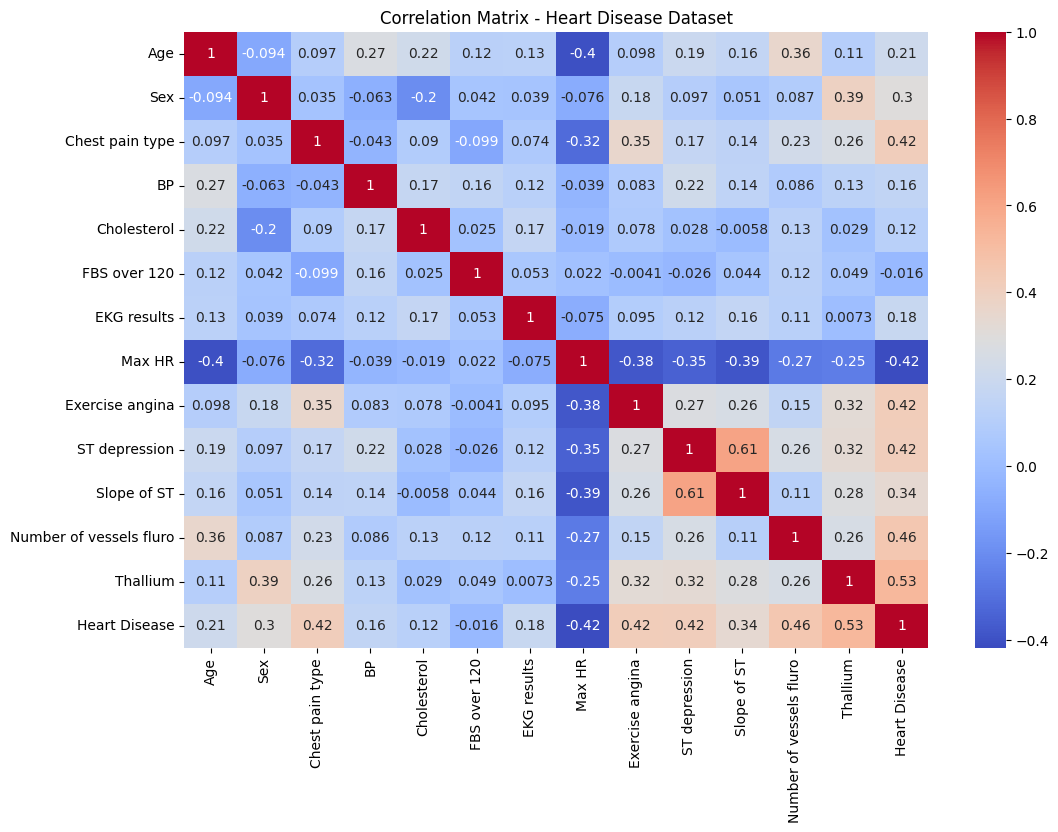

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")
plt.title("Correlation Matrix - Heart Disease Dataset")
plt.show()

# Show Which Features are most Correlation

In [ ]:
corr_matrix["Heart Disease"].sort_values(ascending=False)

Heart Disease              1.000000
Thallium                   0.525020
Number of vessels fluro    0.455336
Exercise angina            0.419303
ST depression              0.417967
Chest pain type            0.417436
Slope of ST                0.337616
Sex                        0.297721
Age                        0.212322
EKG results                0.182091
BP                         0.155383
Cholesterol                0.118021
FBS over 120              -0.016319
Max HR                    -0.418514
Name: Heart Disease, dtype: float64

# 2) Causation
     This shows the hidden variable that also affects target     

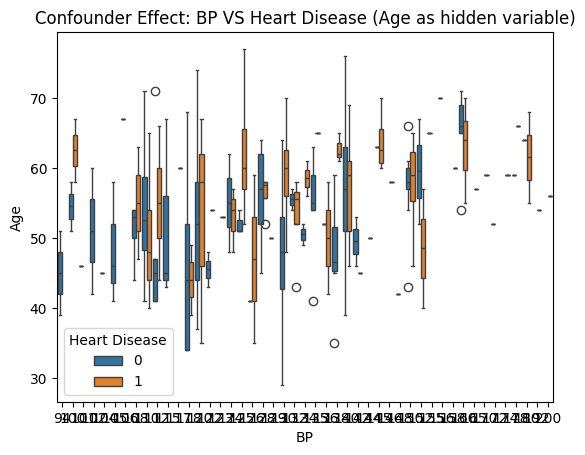

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x="BP", y="Age",hue="Heart Disease",data=df)
plt.title("Confounder Effect: BP VS Heart Disease (Age as hidden variable)")
plt.xlabel("BP")
plt.ylabel("Age")
plt.show()

BP is correlated with heart disease, but age is a confounding variable,
So causation cannot be claimed

# 3) Multicollinearity
     Find if input feature are highly correlated with each other

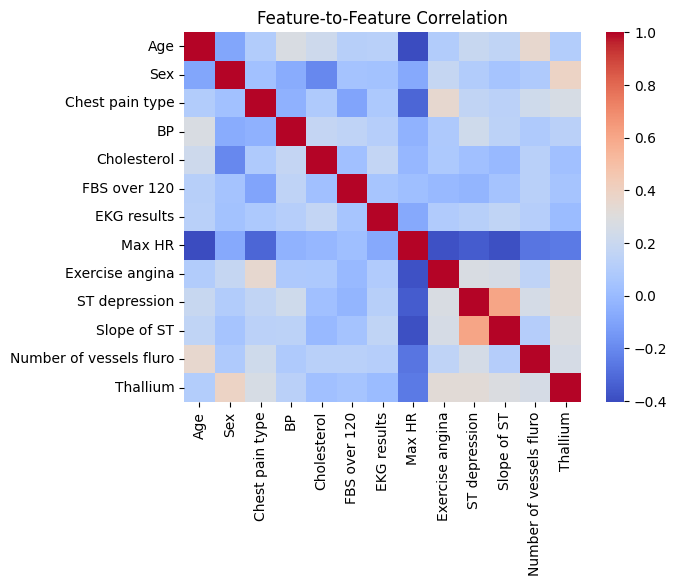

In [20]:
sns.heatmap(df.drop("Heart Disease", axis=1).corr(),cmap="coolwarm")
plt.title("Feature-to-Feature Correlation")
plt.show()

# VIF

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [24]:
x=df.drop("Heart Disease", axis=1)

In [ ]:
Vif_data=pd.DataFrame()
Vif_data["Feature"]=x.columns
Vif_data["Feature"]
Vif_data["VIF"]=[ 
    variance_inflation_factor(x.values,i) 
        for i in range(x.shape[1]
                )]
print(Vif_data)

                    Feature        VIF
0                       Age  40.823075
1                       Sex   3.870928
2           Chest pain type  13.837158
3                        BP  60.445863
4               Cholesterol  27.701609
5              FBS over 120   1.255779
6               EKG results   2.225420
7                    Max HR  33.594670
8           Exercise angina   2.037822
9             ST depression   3.314323
10              Slope of ST  12.365871
11  Number of vessels fluro   1.971122
12                 Thallium  10.383875


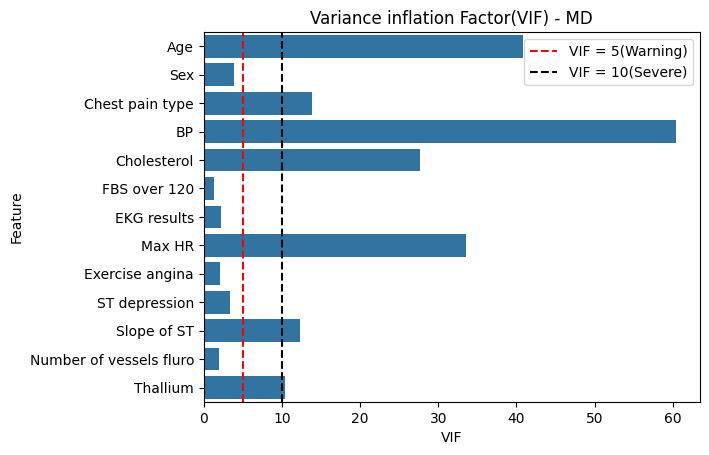

In [36]:
plt.figure()
sns.barplot(x="VIF",y="Feature",data=Vif_data)
plt.axvline(5,color="red", linestyle="--",label="VIF = 5(Warning)")
plt.axvline(10,color="black", linestyle="--",label="VIF = 10(Severe)")
plt.legend()
plt.title("Variance inflation Factor(VIF) - MD")
plt.show()